In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as ss

# Building statistical model from 20 questions dataset

In [10]:
dataset_location = "/Users/evanpan/Documents/Datasets/Audio_turn_taking_dataset/"
gaze_file_20q_name_template = "gaze/{}_20q_game_direct.xls"
gaze_file_heads_up_name_template = "gaze/{}_headsup_game_direct.xls"
talking_file_20q_name_template = "talking/{}_20q_game_talking.xls"
talking_file_heads_up_name_template = "talking/{}_headsup_game_talking.xls"

gaze_dfs = []
talking_dfs = []
# read the the 20q dataset
for i in range(1, 41):
    if i < 10:
        str_i = "0" + str(i)
    else:
        str_i = str(i)
    gaze_path_i = dataset_location + gaze_file_20q_name_template.format(str_i)
    talking_path_i = dataset_location + talking_file_20q_name_template.format(str_i)
    
    gaze_df = pd.read_excel(gaze_path_i)
    gaze_dfs.append(gaze_df)
    talking_df = pd.read_excel(talking_path_i)
    talking_dfs.append(talking_df)
# process them into a time series
gaze_series = []
talking_series = []
duration_of_gaze = []
for i in range(0, 20):
    df1 = talking_dfs[2*i] 
    df2 = talking_dfs[2*i+1]
    diff = df1["stop"][df1["stop"].shape[0]-1] - df1["start"][0]
    end = max(df1["stop"][df1["stop"].shape[0]-1], df2["stop"][df2["stop"].shape[0]-1])
    start = min(df1["start"][0], df2["start"][0])
    series = start - end
    for j in range(0, df1["start"].shape[0]):
        duration_of_gaze.append((df1["stop"][j] - df1["start"][j])/1000)
    for j in range(0, df2["start"].shape[0]):
        duration_of_gaze.append((df2["stop"][j] - df2["start"][j])/1000)
    

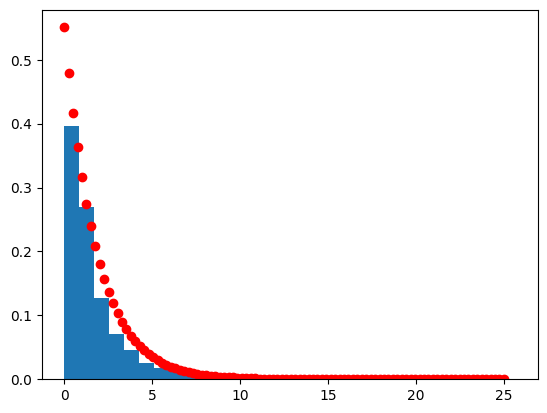

In [32]:
weights = np.ones_like(np.array(duration_of_gaze))/float(len(duration_of_gaze))
__ = plt.hist(duration_of_gaze, bins=30, weights=weights)
P = ss.expon.fit(duration_of_gaze) # P = [0.0, 1.8153959183673472]
rX = np.linspace(0,25, 100)
rP = ss.expon.pdf(rX, *P)
#Yup, just unpack P with *P, instead of scale=XX and shape=XX, etc.
plt.plot(rX, rP, "ro")

# Building statistical model from headsup dataset

In [34]:
dataset_location = "/Users/evanpan/Documents/Datasets/Audio_turn_taking_dataset/"
gaze_file_20q_name_template = "gaze/{}_20q_game_direct.xls"
gaze_file_heads_up_name_template = "gaze/{}_headsup_game_direct.xls"
talking_file_20q_name_template = "talking/{}_20q_game_talking.xls"
talking_file_heads_up_name_template = "talking/{}_headsup_game_talking.xls"

gaze_dfs = []
talking_dfs = []
# read the the 20q dataset
for i in range(1, 41):
    if i < 10:
        str_i = "0" + str(i)
    else:
        str_i = str(i)
    gaze_path_i = dataset_location + gaze_file_heads_up_name_template.format(str_i)
    talking_path_i = dataset_location + talking_file_heads_up_name_template.format(str_i)
    
    gaze_df = pd.read_excel(gaze_path_i)
    gaze_dfs.append(gaze_df)
    talking_df = pd.read_excel(talking_path_i)
    talking_dfs.append(talking_df)
# process them into a time series
gaze_series = []
talking_series = []
duration_of_gaze = []
for i in range(0, 20):
    df1 = talking_dfs[2*i] 
    df2 = talking_dfs[2*i+1]
    diff = df1["stop"][df1["stop"].shape[0]-1] - df1["start"][0]
    end = max(df1["stop"][df1["stop"].shape[0]-1], df2["stop"][df2["stop"].shape[0]-1])
    start = min(df1["start"][0], df2["start"][0])
    series = start - end
    for j in range(0, df1["start"].shape[0]):
        duration_of_gaze.append((df1["stop"][j] - df1["start"][j])/1000)
    for j in range(0, df2["start"].shape[0]):
        duration_of_gaze.append((df2["stop"][j] - df2["start"][j])/1000)
    

(0.0, 1.9936180124223601)


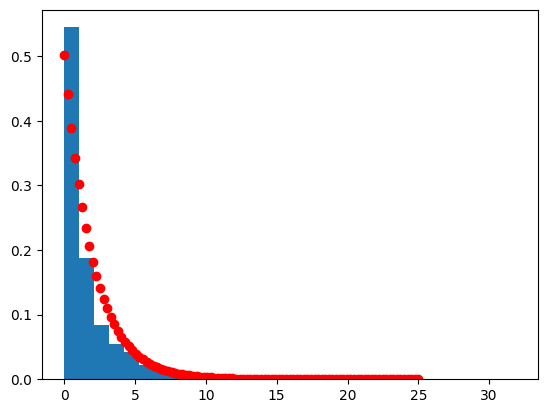

In [36]:
weights = np.ones_like(np.array(duration_of_gaze))/float(len(duration_of_gaze))
__ = plt.hist(duration_of_gaze, bins=30, weights=weights)
P = ss.expon.fit(duration_of_gaze) # P = (0.0, 1.9936180124223601)
print(P)
rX = np.linspace(0,25, 100)
rP = ss.expon.pdf(rX, *P)
#Yup, just unpack P with *P, instead of scale=XX and shape=XX, etc.
plt.plot(rX, rP, "ro")

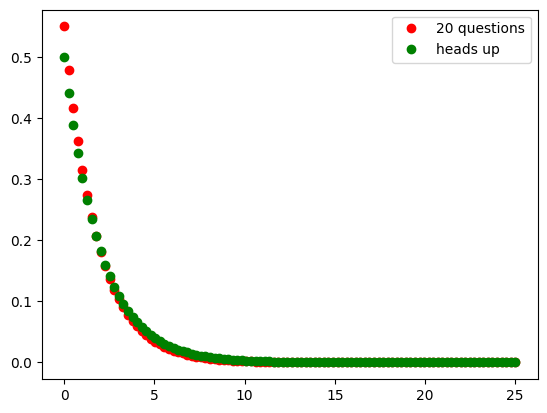

In [39]:
P_20q = [0.0, 1.8153959183673472]
rX = np.linspace(0,25, 100)
rP = ss.expon.pdf(rX, *P_20q)
plt.plot(rX, rP, "ro", label="20 questions")
P_heads_up = [0.0, 1.9936180124223601]
rX = np.linspace(0,25, 100)
rP = ss.expon.pdf(rX, *P_heads_up)
plt.plot(rX, rP, "go", label="heads up")
plt.legend()


(array([5.645e+03, 2.480e+03, 1.042e+03, 5.030e+02, 1.880e+02, 7.900e+01,
        4.300e+01, 1.400e+01, 1.000e+00, 5.000e+00]),
 array([2.42988142e-04, 1.50609848e+00, 3.01195396e+00, 4.51780945e+00,
        6.02366494e+00, 7.52952043e+00, 9.03537592e+00, 1.05412314e+01,
        1.20470869e+01, 1.35529424e+01, 1.50587979e+01]),
 <BarContainer object of 10 artists>)

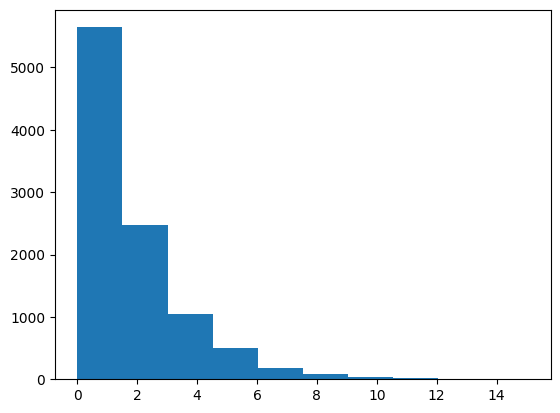

In [44]:
# scipy.stats
exponential = ss.expon(loc=0, scale=1.8153959183673472)
plt.hist(exponential.rvs(10000))